# Movimiento de Proyectiles

La ecuacion del movimeinto de proyectiles es:
$$m \dot{v_x}=0m\dot{v_y}=-mgy$$
donde $m$ es la masa y $g$ la aceleracion gravitacional cerca de la tierra.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Aceleracion debido a la gravedad
g = 9.81

In [11]:
# Definimos una funcion que solucione el problema
def exact_solution(v0, phi):
    """
    :param v0: magnitud inicial de la velocidad
    :param phi: angulo inicial
    :return: 
    """
    impact_time = 2 * v0 * np.sin(phi) / g
    t = np.linspace(0, impact_time, 1000)
    x = v0 * np.cos(phi) * t
    y = v0 * np.sin(phi) * t - (g * t ** 2) / 2
    return x, y

In [12]:
# Calculamos la solucion exacta
x, y = exact_solution(10, np.pi/6)

Text(0.5, 1.0, 'Proyectil sin resistencia del aire')

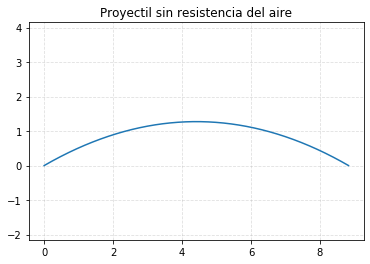

In [14]:
plt.plot(x,y)
plt.grid(alpha=.4, linestyle='--')
plt.axis('equal')
plt.ylim(0, 2)
plt.title('Proyectil sin resistencia del aire')

## Con resistencia del aire
Aqui el modelo camba un poquito:
$$m\dot{v_x}=-k|v|v_xm\dot{v_y}=-mgy-k|v|v_y$$
donde $|v|=\sqrt{v_x^2+v_y^2}$.

In [16]:
from scipy.integrate import odeint

In [15]:
# Configuracion de los Parametros
rho_air = 1.29  # Densidad del aire (kg/m^3)
m = 0.16  # masa del proyectil (kg)
cD = 0.5  # Coeficiente de arrastre (proeyctil esferico)
r = 0.0366  # radio del proyectil (m)
k = 0.5 * cD * (np.pi * r ** 2) * rho_air / m

In [17]:
# Definicmos una foncion que solucione el problema
def solve_projectile(init):
    def func(vec, _):
        vx, vy = vec[2], vec[3]
        # Derivada temporal del vector vec
        v = np.sqrt(vx ** 2 + vy ** 2)
        return [vx, vy, -k * v * vx, -g - k * v * vy]

    # impacto de la resistencia del aire en el movimiento
    impact_time = 2 * init[3] / g
    solution = odeint(func, init,
                      np.linspace(0, impact_time, 1000))
    return solution

In [18]:
# Configuraciones del problema
v0 = 50  # Rapidez inicial (m/s)
phi = np.pi / 4  # Angulo de lam=nzamiento (deg.)
initial_conditions = [0, 0, v0 * np.cos(phi), v0 * np.sin(phi)]
solution = solve_projectile(initial_conditions) 
xt, yt = solution[:, 0], solution[:, 1]

In [19]:
def find_last_positive_index(vl):
    for i in range(len(vl)):
        if vl[i + 1] < 0:
            return i
    return -1

In [20]:
index = find_last_positive_index(yt)
yt = yt[0:index]
xt = xt[0:index]

Text(0.5, 1.0, 'Proyectil con arrastre de Newton')

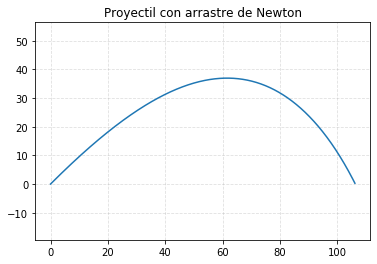

In [21]:
plt.plot(xt,yt)
plt.grid(alpha=.4, linestyle='--')
plt.axis('equal')
plt.title('Proyectil con arrastre de Newton')